# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# !pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=965f6045e5c7faef2b954436d136ac8175e5477e4507dbf07e9823883c130c54
  Stored in directory: c:\users\30798\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
#         format dt to readable date
# (city_weather['dt'].toDateString())
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | nantucket
Processing Record 5 of Set 1 | kungurtug
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | khandbari
Processing Record 8 of Set 1 | obo
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | saint-joseph
Processing Record 11 of Set 1 | imbituba
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | banda aceh
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hangu
Processing Record 18 of Set 1 | zyryanka
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 

Processing Record 38 of Set 4 | boysun
Processing Record 39 of Set 4 | roald
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | kavieng
Processing Record 42 of Set 4 | kaposvar
Processing Record 43 of Set 4 | balimo
City not found. Skipping...
Processing Record 44 of Set 4 | ginir
Processing Record 45 of Set 4 | geraldton
Processing Record 46 of Set 4 | amapa
Processing Record 47 of Set 4 | sukhobuzimskoye
Processing Record 48 of Set 4 | miraflores
Processing Record 49 of Set 4 | doha
Processing Record 0 of Set 5 | sao joao da barra
Processing Record 1 of Set 5 | boguchany
Processing Record 2 of Set 5 | mandalgovi
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | williston
Processing Record 5 of Set 5 | pangnirtung
Processing Record 6 of Set 5 | imeni poliny osipenko
Processing Record 7 of Set 5 | nabire
Processing Record 8 of Set 5 | rio grande
Processing Record 9 of Set 5 | tobias barreto
Processing Record 10 of Set 5 | naze
Processing 

Processing Record 27 of Set 8 | bilgoraj
Processing Record 28 of Set 8 | sangar
Processing Record 29 of Set 8 | salinas
Processing Record 30 of Set 8 | mogadishu
Processing Record 31 of Set 8 | gornopravdinsk
Processing Record 32 of Set 8 | tokur
Processing Record 33 of Set 8 | kuche
City not found. Skipping...
Processing Record 34 of Set 8 | mapastepec
Processing Record 35 of Set 8 | shellbrook
Processing Record 36 of Set 8 | dalbandin
Processing Record 37 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 8 | diamantino
Processing Record 39 of Set 8 | wencheng
Processing Record 40 of Set 8 | zhezkazgan
Processing Record 41 of Set 8 | felanitx
Processing Record 42 of Set 8 | aksu
Processing Record 43 of Set 8 | dois vizinhos
Processing Record 44 of Set 8 | kununurra
Processing Record 45 of Set 8 | miri
Processing Record 46 of Set 8 | sanchor
Processing Record 47 of Set 8 | necochea
Processing Record 48 of Set 8 | alugan
Processing Record 49 of Set 8 | stokmarknes
Process

Processing Record 17 of Set 12 | ocampo
Processing Record 18 of Set 12 | tilichiki
Processing Record 19 of Set 12 | tromso
Processing Record 20 of Set 12 | pokhara
Processing Record 21 of Set 12 | edson
Processing Record 22 of Set 12 | izumo
Processing Record 23 of Set 12 | creel
Processing Record 24 of Set 12 | yerbogachen
Processing Record 25 of Set 12 | westerland
Processing Record 26 of Set 12 | ocos
Processing Record 27 of Set 12 | lityn
Processing Record 28 of Set 12 | hiji
Processing Record 29 of Set 12 | komsomolskiy
Processing Record 30 of Set 12 | blagoyevo
Processing Record 31 of Set 12 | suez
Processing Record 32 of Set 12 | hemnesberget
Processing Record 33 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 12 | roros
Processing Record 35 of Set 12 | mareeba
Processing Record 36 of Set 12 | gladstone
Processing Record 37 of Set 12 | san ignacio
Processing Record 38 of Set 12 | bouca
Processing Record 39 of Set 12 | sladkovo
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,19.78,83,94,3.72,ZA,1667526336
1,kapaa,22.0752,-159.3190,28.18,76,75,6.69,US,1667526336
2,port alfred,-33.5906,26.8910,19.29,83,63,7.39,ZA,1667526337
3,nantucket,41.2835,-70.0995,13.89,88,0,3.60,US,1667526337
4,kungurtug,50.5994,97.5228,-7.52,76,100,0.59,RU,1667526337


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,19.78,83,94,3.72,ZA,1667526336
1,kapaa,22.0752,-159.3190,28.18,76,75,6.69,US,1667526336
2,port alfred,-33.5906,26.8910,19.29,83,63,7.39,ZA,1667526337
3,nantucket,41.2835,-70.0995,13.89,88,0,3.60,US,1667526337
4,kungurtug,50.5994,97.5228,-7.52,76,100,0.59,RU,1667526337


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

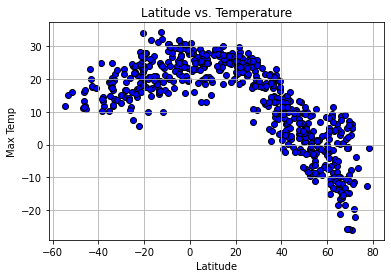

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')
# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature")
# plt.figure(figsize=(10,7))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

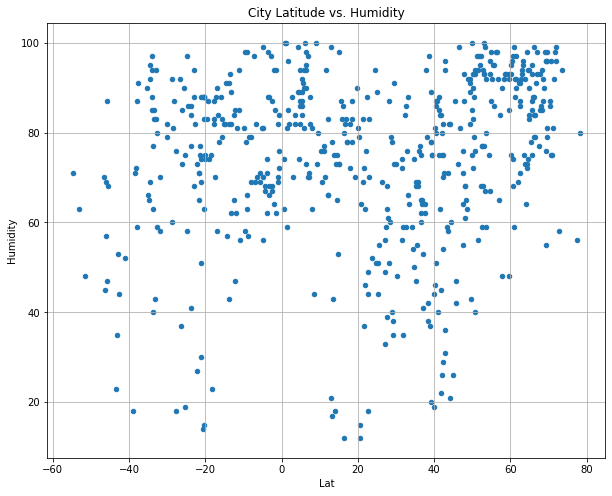

In [15]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# car_data.plot(kind="scatter", x="horsepower", y="L/100km", grid=True, figsize=(8,8),
#               title="L/100km Vs. Horsepower")
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True, figsize=(10,8), title='City Latitude vs. Humidity')
# Incorporate the other graph properties
# YOUR CODE HERE **how to change x axis label with pandas? 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

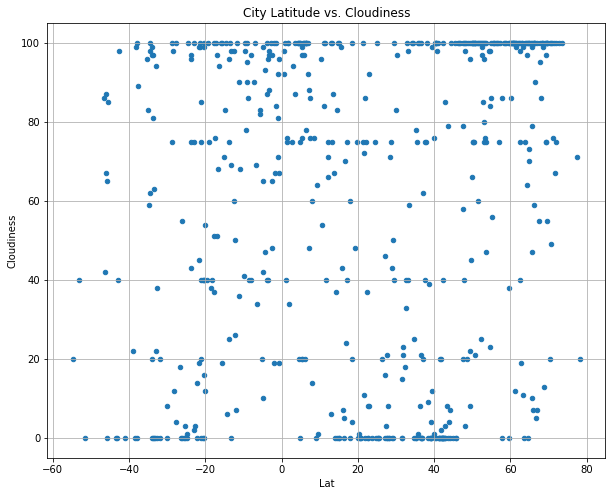

In [16]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, figsize=(10,8), title='City Latitude vs. Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

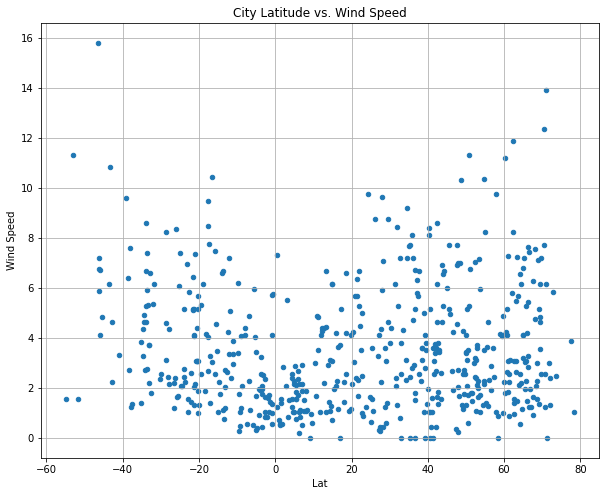

In [17]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, figsize=(10,8), title='City Latitude vs. Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lr_func(x,y):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values)
    plt.title(f'Linear Regression for Latitude vs. {y}')
    plt.grid()
#     i = y_list.index    
#     plt.savefig(f"output_data/LinearRegresion_Fig{i}.png")
    plt.show()

x= city_data_df['Lat']
# Max Temp	Humidity	Cloudiness	Wind Speed
# y = [city_data_df['Max Temp'], city_data_df['Humidity'], city_data_df['Cloudiness'], city_data_df['Wind Speed']]
# y = city_data_df['Max Temp']

# lr_func(x,y)

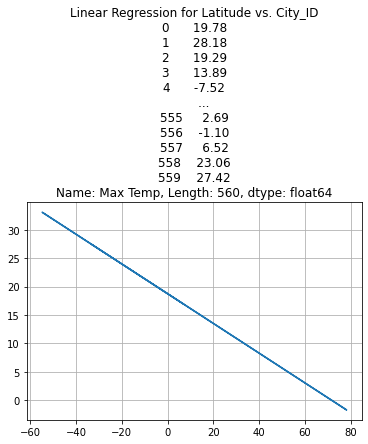

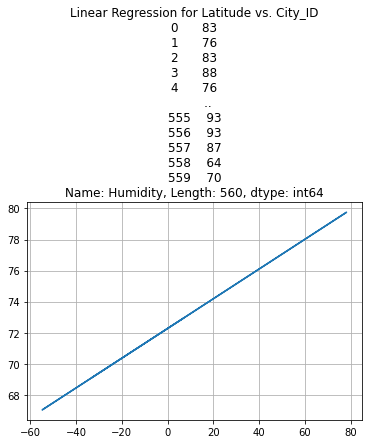

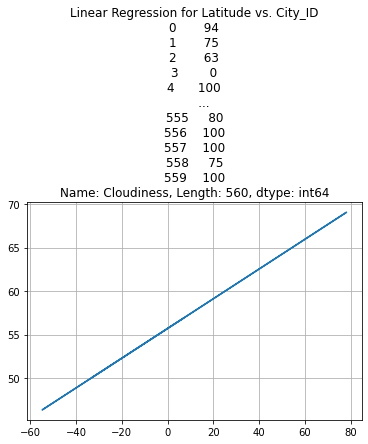

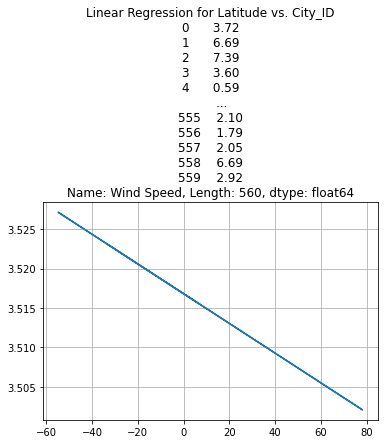

In [39]:
y_list = [city_data_df['Max Temp'], city_data_df['Humidity'], city_data_df['Cloudiness'], city_data_df['Wind Speed']]
for y in y_list:
    lr_func(x,y)
#     i = y_list.index(y)



In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapaa,22.0752,-159.3190,28.18,76,75,6.69,US,1667526336
3,nantucket,41.2835,-70.0995,13.89,88,0,3.60,US,1667526337
4,kungurtug,50.5994,97.5228,-7.52,76,100,0.59,RU,1667526337
5,kodiak,57.7900,-152.4072,2.73,48,0,9.77,US,1667526338
6,khandbari,27.3747,87.2039,18.30,59,3,0.45,NP,1667526338


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,19.78,83,94,3.72,ZA,1667526336
2,port alfred,-33.5906,26.8910,19.29,83,63,7.39,ZA,1667526337
8,hermanus,-34.4187,19.2345,18.78,92,100,4.91,ZA,1667526339
9,saint-joseph,-21.3667,55.6167,23.59,75,100,2.03,RE,1667526340
10,imbituba,-28.2400,-48.6703,14.46,87,12,2.43,BR,1667526182


###  Temperature vs. Latitude Linear Regression Plot

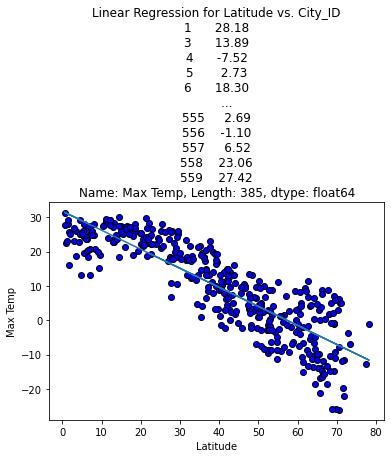

<Figure size 432x288 with 0 Axes>

In [48]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')
# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")
# plt.figure(figsize=(10,7))

# Save the figure


# Show plot

# Linear regression on Northern Hemisphere
x= northern_hemi_df['Lat']
y=northern_hemi_df['Max Temp']
lr_func(x,y)

plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: 0.4121057168607245


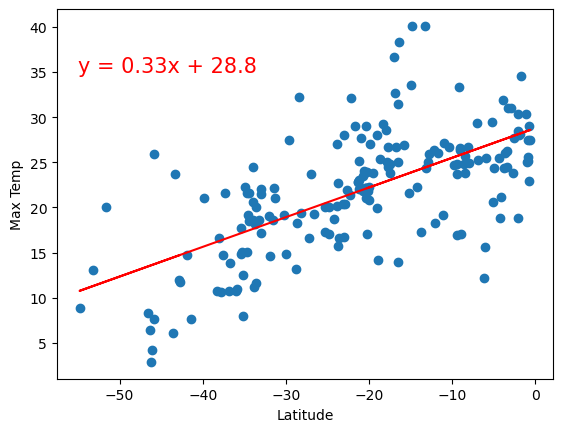

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


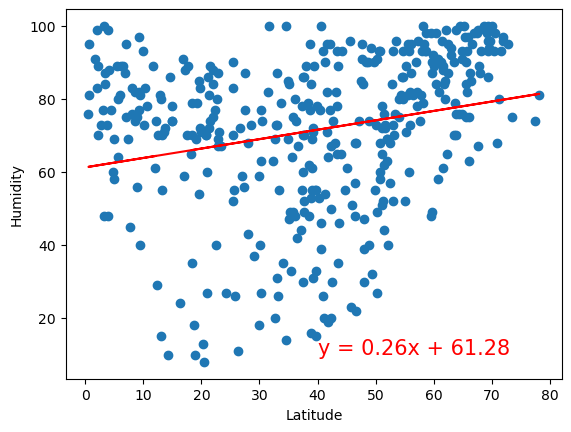

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


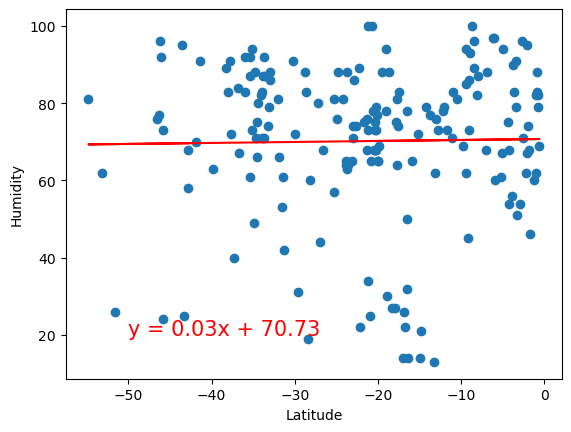

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


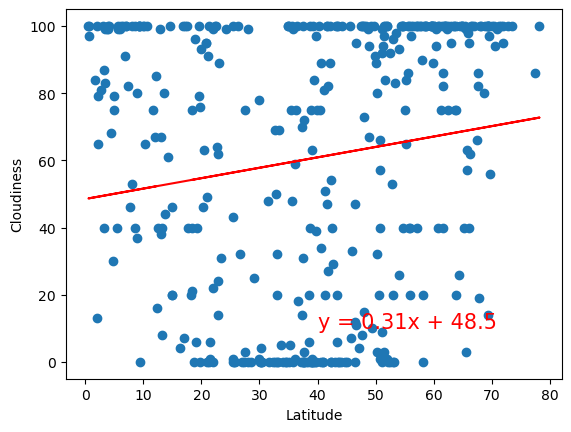

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


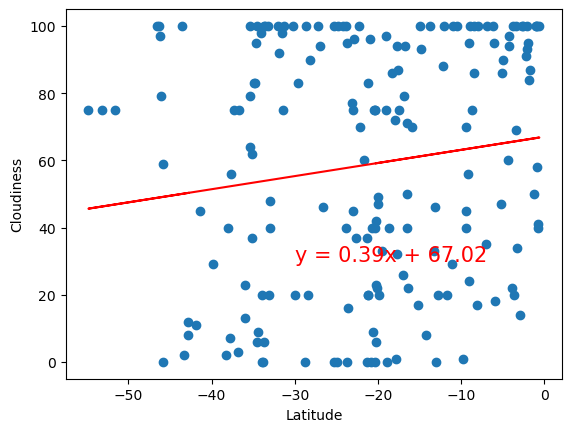

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


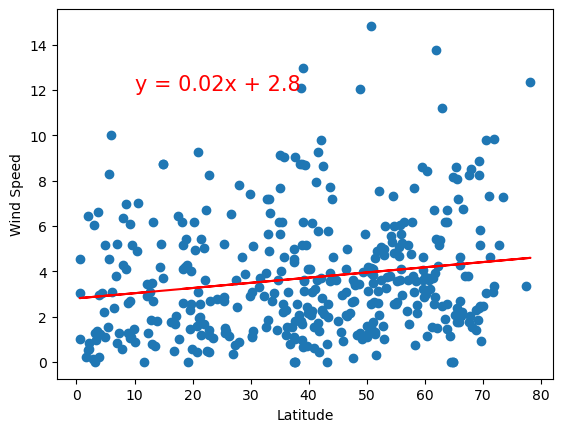

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


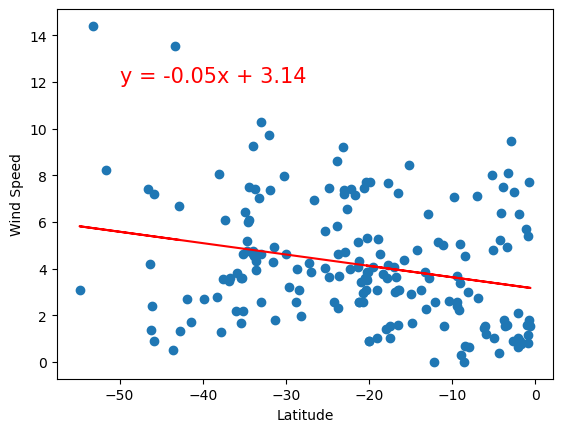

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE